## Import Dependencies

In [29]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

## Getting the Data

In [3]:
data = pd.read_csv('./data/car data.csv')

In [4]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### Checking the distribution of categorical data

In [12]:
print('---------------------------')
print(data.Fuel_Type.value_counts())
print('---------------------------')
print(data.Seller_Type.value_counts())
print('---------------------------')
print(data.Transmission.value_counts())
print('---------------------------')

---------------------------
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
---------------------------
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
---------------------------
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
---------------------------


## Encoding the categorical data

In [14]:
data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG': 2}},inplace=True)
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [15]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Splitting the Data

In [16]:
X = data.drop(['Car_Name','Selling_Price'], axis=1)
y = data['Selling_Price']

In [18]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

## Splitting Training and Test data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train the Model

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train,y_train)

LinearRegression()

## Predictions

In [23]:
predictions = model.predict(X_test)
predictions

array([ 2.84503948,  8.17433042,  6.15503229, -1.53474297,  9.10478102,
        7.12513416,  1.41208877,  0.85727713,  1.42824591,  7.18732696,
        8.77738476,  0.64604862,  8.19199294,  3.27496701,  6.58156734,
        3.12524913,  0.47776322, 10.71519858,  1.81845542,  2.3948969 ,
        0.40800604,  7.78763597,  6.25976337,  2.59710749,  0.8401473 ,
        3.68243396,  5.30447357,  2.81900104,  2.20840021,  1.82500826,
        0.41732684,  8.85691122, -0.6636885 ,  2.2707602 ,  8.2948583 ,
        4.51208942,  7.29749227,  7.54243321,  2.9482584 ,  7.9275823 ,
        3.90745022,  4.17258578,  4.31519575,  0.69858995,  7.02594603,
        0.53398622,  7.32449179, 11.09649499,  3.13148761,  5.06495644,
        6.60928574,  2.2345092 , 20.15115757, 16.47662698,  7.25913588,
        9.54127202,  4.43952683,  8.67649783,  1.75283042,  7.41244863,
        0.27553659, -2.53278607,  2.01366813, -1.56020807,  4.79226982,
        1.86019863, 19.80408464, 17.88217176,  5.42372796, -0.54

Text(0.5, 1.0, 'Selling Price vs. Model Predictions')

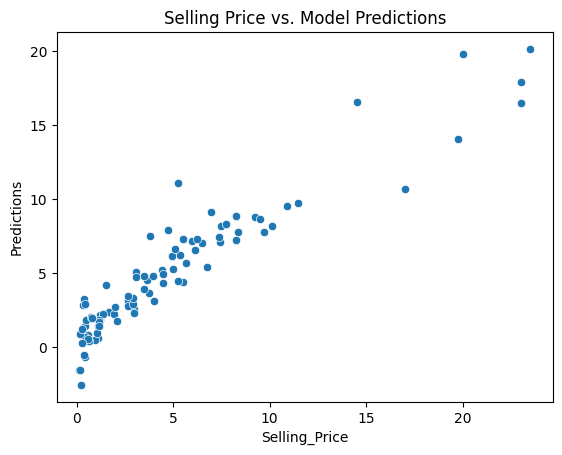

In [27]:
sns.scatterplot(x=y_test, y=predictions)
plt.ylabel('Predictions')
plt.title('Selling Price vs. Model Predictions')

In [30]:
print('Mean absolute Error: ', mean_absolute_error(y_test, predictions))
print('Mean Squared Error: ', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error: ', math.sqrt(mean_squared_error(y_test, predictions)))
print('R Mean Squared Error: ', r2_score(y_test, predictions))

Mean absolute Error:  1.258140470647224
Mean Squared Error:  3.4932860262274854
Root Mean Squared Error:  1.8690334470595986
R Mean Squared Error:  0.8773175030337714


### Let`s see how Lasso Regression model performs here, because linear_regression is not producing good predictions

## Lasso Regression

In [32]:
lasso_model = Lasso()

In [33]:
lasso_model.fit(X_train, y_train)

Lasso()

### Lasso Model Predictions

In [36]:
lasso_predictions = lasso_model.predict(X_test)
lasso_predictions

array([ 2.00205505,  8.38911747,  4.93553383,  0.44656319,  9.79709818,
        5.68161729,  2.12919963,  1.61570894,  2.0292336 ,  5.86929965,
        7.19789073,  1.49614559,  7.0103341 ,  2.36959846,  5.30008347,
        3.02662125,  1.420098  , 11.15003342,  2.35369479,  3.00585217,
        1.22419269,  6.31257833,  5.05111384,  2.65735954,  1.59817993,
        3.77144831,  5.49422581,  2.91124051,  2.7956607 ,  2.47909836,
        1.23519166,  7.76246876,  0.36274208,  2.64272043,  6.88972153,
        4.47733299,  7.75346027,  8.49758725,  2.82529512,  8.81558865,
        4.84935269,  3.64013369,  4.2525419 ,  1.43970841,  5.56827863,
        1.36909914,  7.66358439, 10.77528926,  3.02988025,  3.69990713,
        5.33683957,  2.82447428, 18.80394381, 14.40428363,  5.83550124,
        8.30654779,  4.27483097,  7.32102156,  2.28910428,  5.89344004,
        1.07612555, -0.33410664,  2.57425532, -0.41634545,  4.67786682,
        2.51793405, 18.52708766, 16.2330288 ,  5.39124006,  0.38

Text(0.5, 1.0, 'Selling Price vs. Model Predictions')

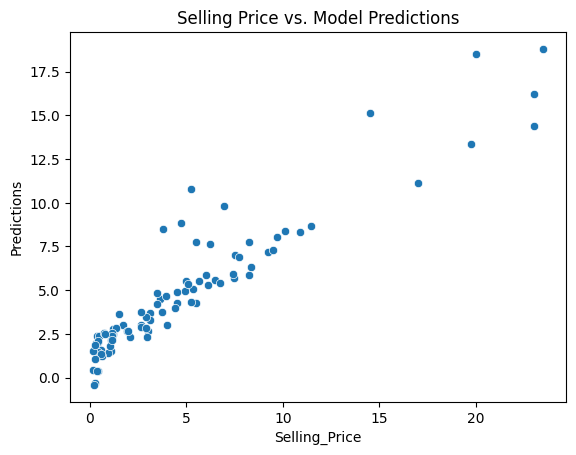

In [37]:
sns.scatterplot(x=y_test, y=lasso_predictions)
plt.ylabel('Predictions')
plt.title('Selling Price vs. Model Predictions')

In [38]:
print('Mean absolute Error: ', mean_absolute_error(y_test, lasso_predictions))
print('Mean Squared Error: ', mean_squared_error(y_test, lasso_predictions))
print('Root Mean Squared Error: ', math.sqrt(mean_squared_error(y_test, lasso_predictions)))
print('R Mean Squared Error: ', r2_score(y_test, lasso_predictions))

Mean absolute Error:  1.456700634868869
Mean Squared Error:  4.5666949748316705
Root Mean Squared Error:  2.1369826800495297
R Mean Squared Error:  0.8396199056735947


### Let`s see how XGB Regression model performs here, because Lasso Regression Model is also not producing that good results

In [39]:
from xgboost import XGBRegressor

In [41]:
xgboost_model = XGBRegressor()

In [42]:
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [43]:
xgboost_predictions = xgboost_model.predict(X_test)
xgboost_predictions

array([ 0.40690106, 11.375293  ,  5.156173  ,  0.34396863,  7.131     ,
        6.8152757 ,  1.2267673 ,  0.50588554,  0.41465953,  6.739604  ,
        7.6984334 ,  0.8395718 ,  6.831185  ,  0.51535445,  5.600983  ,
        2.4369283 ,  1.0574441 , 14.623676  ,  0.5760301 ,  1.4883355 ,
        0.28053737,  8.47336   ,  5.1047297 ,  2.5737917 ,  0.5470939 ,
        4.3463655 ,  5.3752503 ,  2.85094   ,  1.2050266 ,  1.302976  ,
        0.47791487, 11.609147  ,  0.4099892 ,  2.8144972 ,  7.7592983 ,
        4.159761  ,  5.2817864 ,  5.3368    ,  2.4563775 ,  6.1958656 ,
        2.837849  ,  2.9596457 ,  4.75413   ,  0.69924086,  6.574678  ,
        0.56360686,  8.458875  ,  4.793373  ,  2.7494428 ,  4.3000293 ,
        4.726374  ,  1.3952392 , 21.48894   , 21.699074  ,  6.2526646 ,
        9.390385  ,  5.097046  ,  8.292837  ,  2.528038  ,  7.040416  ,
        0.2966554 ,  0.18845424,  1.0103751 ,  0.32296214,  3.7700453 ,
        1.3463017 , 18.96969   , 22.999979  ,  6.291502  ,  0.34

Text(0.5, 1.0, 'Selling Price vs. Model Predictions')

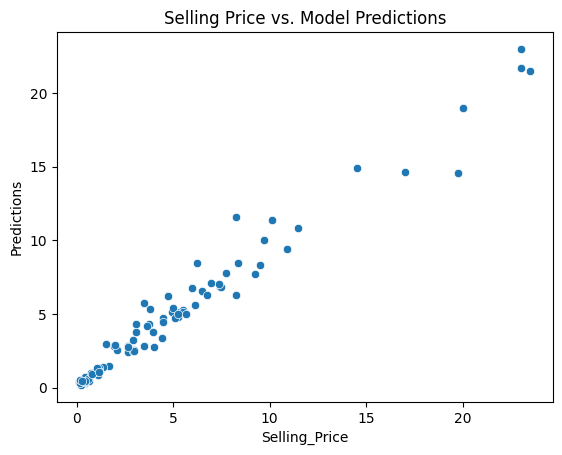

In [44]:
sns.scatterplot(x=y_test, y=xgboost_predictions)
plt.ylabel('Predictions')
plt.title('Selling Price vs. Model Predictions')

In [45]:
print('Mean absolute Error: ', mean_absolute_error(y_test, xgboost_predictions))
print('Mean Squared Error: ', mean_squared_error(y_test, xgboost_predictions))
print('Root Mean Squared Error: ', math.sqrt(mean_squared_error(y_test, xgboost_predictions)))
print('R Mean Squared Error: ', r2_score(y_test, xgboost_predictions))

Mean absolute Error:  0.5977310896574796
Mean Squared Error:  1.0043084319151878
Root Mean Squared Error:  1.002151900619456
R Mean Squared Error:  0.9647291789946406


### Residuals

### LinearRegression model residuals

In [46]:
residuals = y_test - predictions
residuals

177   -2.495039
289    1.935670
228   -1.205032
198    1.684743
60    -2.154781
         ...   
119    0.115019
19    -0.779087
181   -0.966282
79    -2.087431
114   -0.296144
Name: Selling_Price, Length: 91, dtype: float64

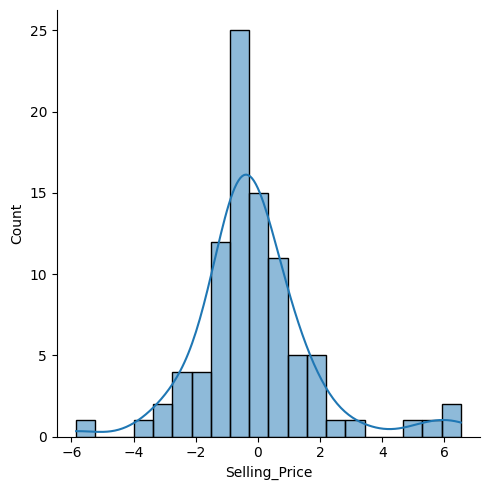

In [47]:
sns.displot(residuals, bins=20, kde=True)

In [48]:
import pylab
import scipy.stats as stats

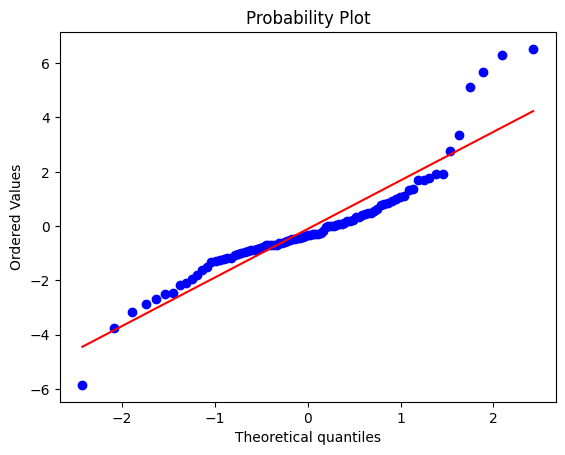

In [49]:
stats.probplot(residuals, dist='norm', plot=pylab)
pylab.show()

### Lasso model residuals

In [50]:
residuals = y_test - lasso_predictions
residuals

177   -1.652055
289    1.720883
228    0.014466
198   -0.296563
60    -2.847098
         ...   
119   -0.770384
19    -1.069075
181   -1.549741
79    -0.622676
114   -1.016783
Name: Selling_Price, Length: 91, dtype: float64

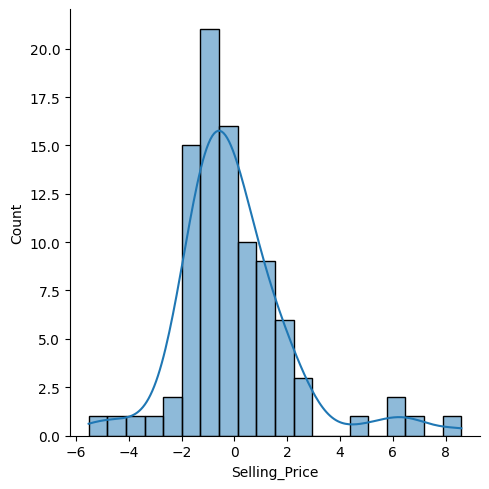

In [51]:
sns.displot(residuals, bins=20, kde=True)

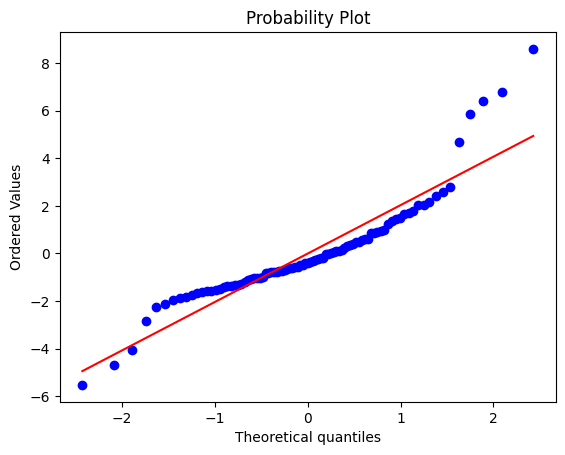

In [52]:
stats.probplot(residuals, dist='norm', plot=pylab)
pylab.show()

### XGBoost model residuals

In [53]:
residuals = y_test - xgboost_predictions
residuals

177   -0.056901
289   -1.265293
228   -0.206173
198   -0.193969
60    -0.181000
         ...   
119   -0.275996
19    -0.074993
181   -0.145451
79    -0.401336
114    0.090779
Name: Selling_Price, Length: 91, dtype: float64

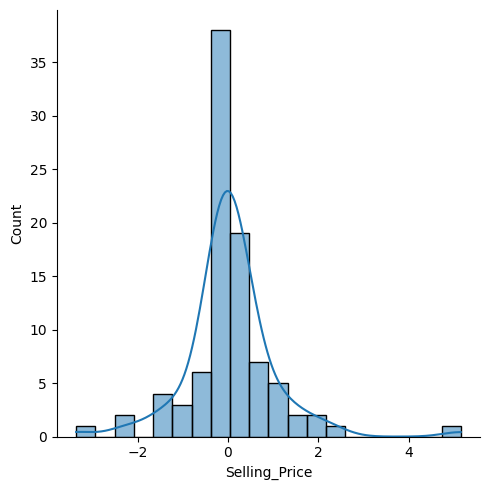

In [54]:
sns.displot(residuals, bins=20, kde=True)

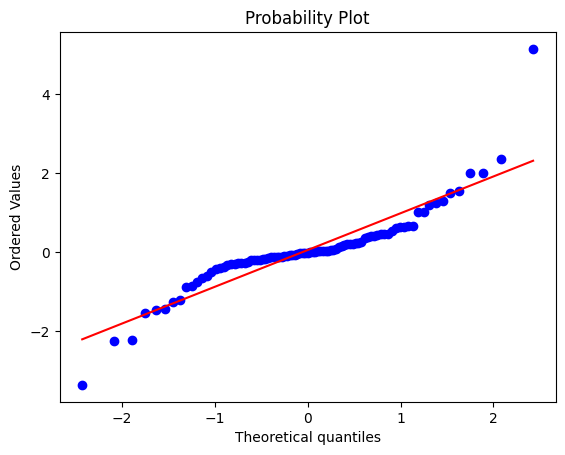

In [57]:
stats.probplot(residuals, dist='norm', plot=pylab)
pylab.show()

### We can clearly observe from the probability plots that linear Regression model and lasso model perform badly on the dataset whereas xgboost model is slightly better than the other two. I will try to improve the metrics on some other day. I`m too busy today.